In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Load Data

In [2]:
df = pd.read_csv("/Users/karananand/ML_Project/notebook/data/stud.csv")

In [7]:
df.shape

(1000, 8)

#### Check Missing Value

In [4]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### Check Duplicates

In [5]:
df.duplicated().sum()

0

#### Check Data Types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [17]:
for c in df.columns[:-3]:
    print(f"Unique values in {c}: {df[c].unique()}")

Unique values in gender: ['female' 'male']
Unique values in race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Unique values in parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique values in lunch: ['standard' 'free/reduced']
Unique values in test_preparation_course: ['none' 'completed']


In [20]:
numeric_features = [col for col in df.columns if df[col].dtype != 'O']
cat_features = [col for col in df.columns if df[col].dtype == 'O']

In [22]:
numeric_features

['math_score', 'reading_score', 'writing_score']

In [23]:
df['total_score'] = df.math_score + df.reading_score + df.writing_score
df['average'] = df['total_score']/3

In [24]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


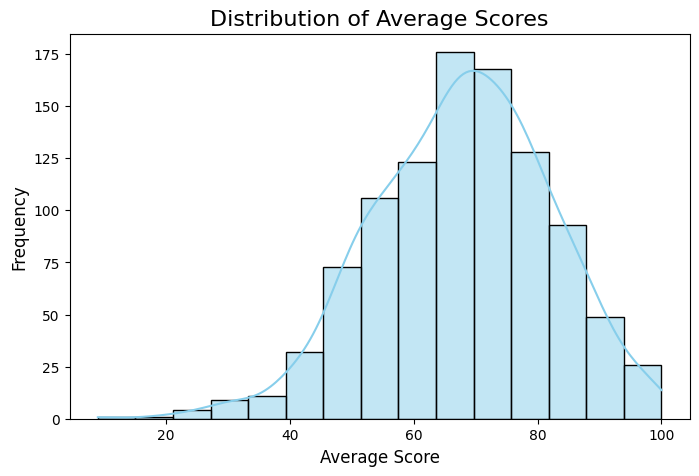

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(df['average'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Average Scores', fontsize=16)
plt.xlabel('Average Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


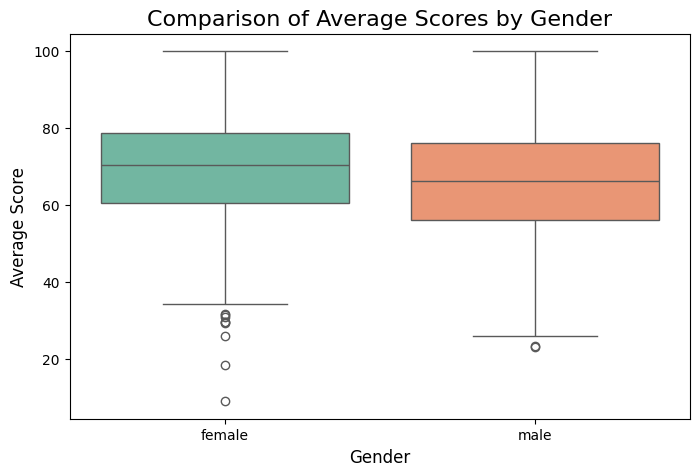

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='gender', y='average', data=df, palette='Set2')
plt.title('Comparison of Average Scores by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.show()

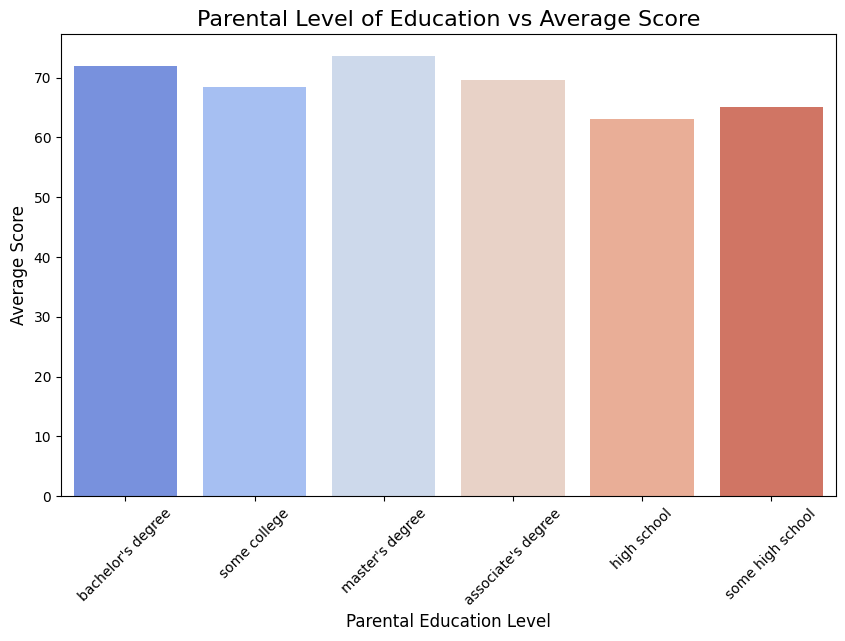

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='parental_level_of_education', y='average', data=df, palette='coolwarm', ci=None)
plt.xticks(rotation=45)
plt.title('Parental Level of Education vs Average Score', fontsize=16)
plt.xlabel('Parental Education Level', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.show()

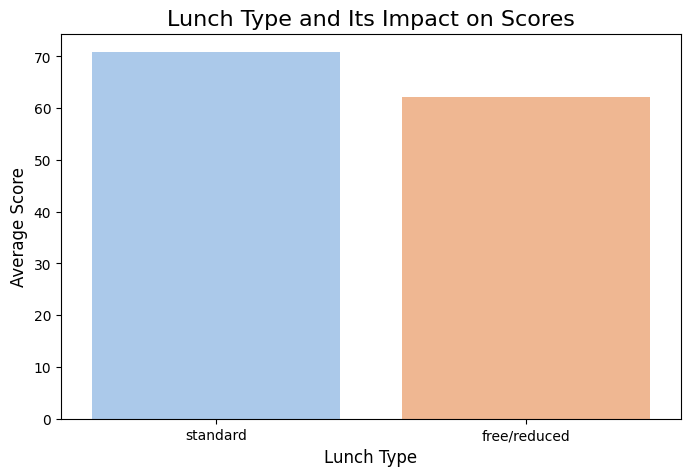

In [29]:
plt.figure(figsize=(8, 5))
sns.barplot(x='lunch', y='average', data=df, palette='pastel', ci=None)
plt.title('Lunch Type and Its Impact on Scores', fontsize=16)
plt.xlabel('Lunch Type', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.show()

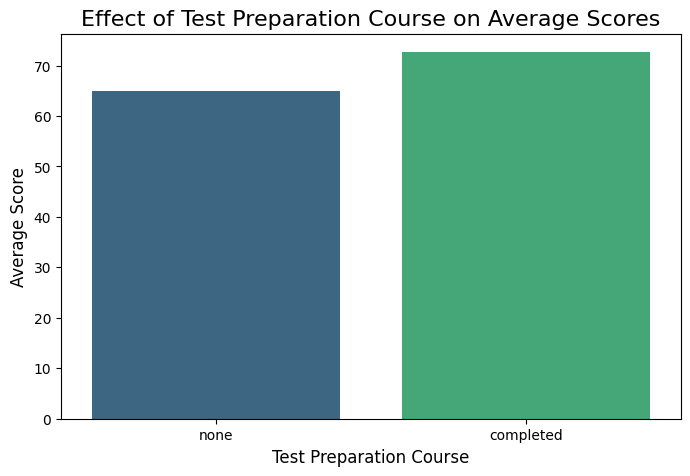

In [31]:
plt.figure(figsize=(8, 5))
sns.barplot(x='test_preparation_course', y='average', data=df, palette='viridis', ci=None)
plt.title('Effect of Test Preparation Course on Average Scores', fontsize=16)
plt.xlabel('Test Preparation Course', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.show()